In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from keras.models import load_model
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
# Re-size all the images to given size
IMAGE_SIZE =[224, 224]

train_path = '/content/drive/MyDrive/Sign Language for Numbers/train'
test_path = '/content/drive/MyDrive/Sign Language for Numbers/test'

In [4]:
#Add preprocessing layer to the fromt of VGG16

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#For not training existing weights
for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [5]:
#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Sign Language for Numbers/train/*')
len(folders)

10

In [6]:
#Layers - we can add if needed
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

#Create a model object
model = Model(inputs=vgg.input, outputs = prediction)

#view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
from keras import optimizers

In [8]:
#Tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255, width_shift_range=0.1, height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Sign Language for Numbers/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Sign Language for Numbers/test',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 12008 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [10]:
cla = test_set.classes
print(cla)

[0 0 0 ... 9 9 9]


In [11]:
r = model.fit(training_set, validation_data=test_set,
              epochs=1,
              steps_per_epoch=len(training_set),
              validation_steps=len(test_set))

751/751 [==============================] - 10266s 14s/step - loss: 0.7582 - accuracy: 0.7846 - val_loss: 0.6726 - val_accuracy: 0.8100


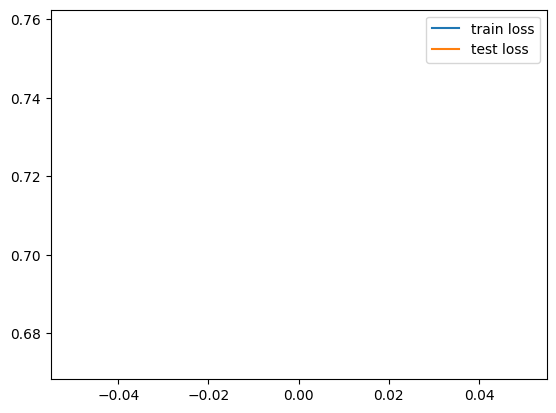

<Figure size 640x480 with 0 Axes>

In [22]:
#Caculate the loss in graph
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.jpg')

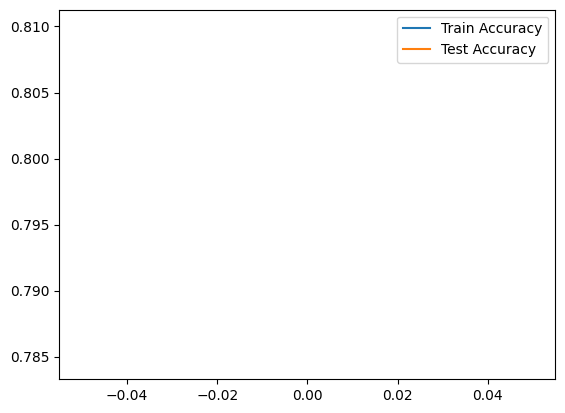

<Figure size 640x480 with 0 Axes>

In [13]:
#Accuracies curve in Graphs
plt.plot(r.history['accuracy'], label = 'Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

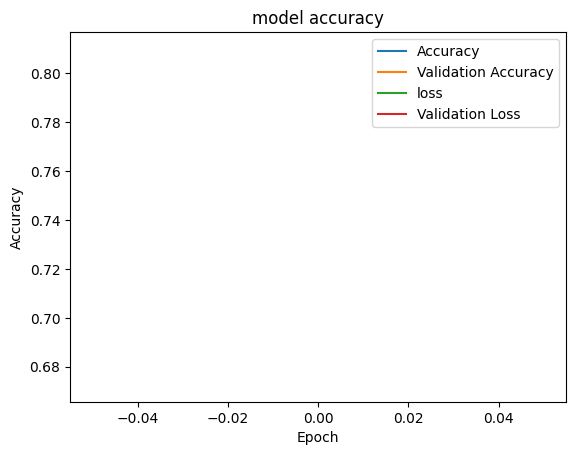

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history["accuracy"])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "loss", "Validation Loss"])
plt.show()

In [15]:
model.save('SignCount_VGG16_Model.h5')
print("Your model is in ==> ", os.getcwd())

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Your model is in ==>  /content


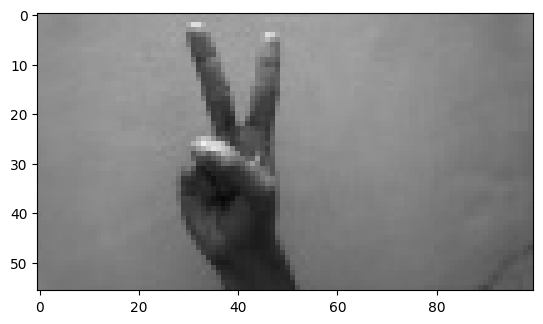

In [16]:
import cv2
img = cv2.imread("/content/drive/MyDrive/Sign Language for Numbers/train/2/two_1004.jpg")
img = img/255
plt.imshow(img)

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Sign Language for Numbers/train',
    validation_split = 0.17, seed = 123,
    subset = "training"
)

Found 12008 files belonging to 10 classes.
Using 9967 files for training.


## **Testing**

In [18]:
path = "/content/drive/MyDrive/Sign Language for Numbers/test/4/four_1206.jpg"

1/1 [==============================] - 1s 948ms/step
4


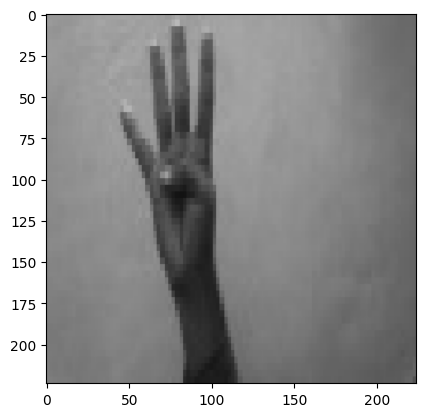

In [19]:
from keras.preprocessing import image
from keras.utils import load_img
img = load_img(path, target_size = (224, 224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
cls = train_ds.class_names
output = cls[np.argmax(output)]
print(output)

In [20]:
output = np.argmax(output)
print(output)

0


In [21]:
cls = train_ds.class_names
cls[np.argmax(output)]

'0'